/var/folders/wv/gyf44h3j2j7_0l6h0jpy65mm0000gn/T/ipykernel_14316/3643354112.py:14: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "ro-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(x_values, velocity_values, 'ro-', label='Velocity (cm/s)', markersize=8, linestyle = '--',linewidth=1)
/var/folders/wv/gyf44h3j2j7_0l6h0jpy65mm0000gn/T/ipykernel_14316/3643354112.py:26: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bo-" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(x_values, disp_values, 'bo-', label='Disp (BL/cycle)', markersize=8, linestyle = '--',linewidth=1)


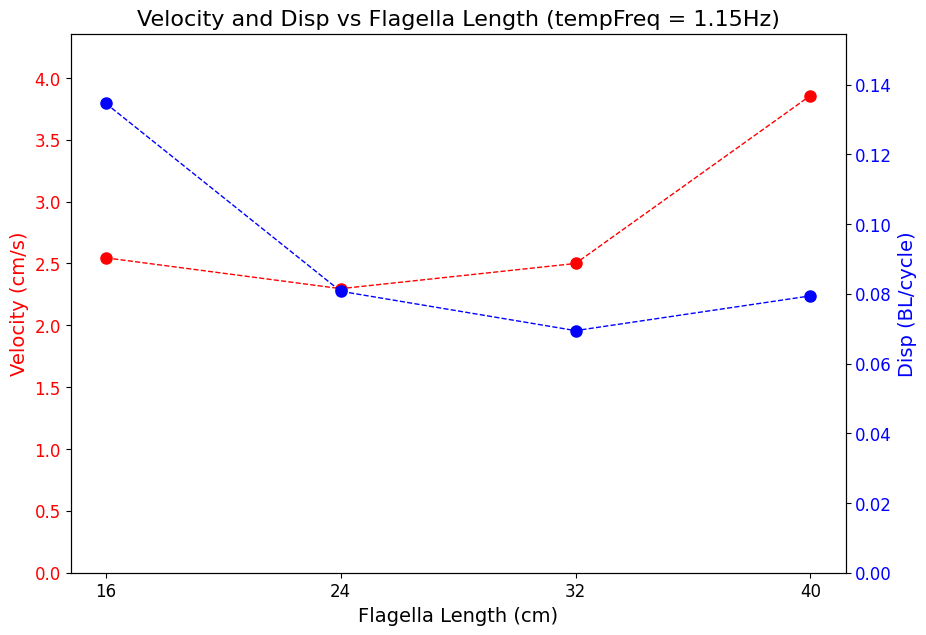

In [1]:
import matplotlib.pyplot as plt

# Data values
x_values = [16, 24, 32, 40]  #[40, 32, 24, 16]
velocity_values = [2.545454545, 2.296296296, 2.5, 3.857142857]  # Velocity in cm/s, reordered
disp_values = [0.134615385, 0.080729167, 0.069444444, 0.079411765]  # Disp in BL/cycle, reordered

# Create a plot with two y-axes with the corrected x-axis order and y-axis starting from 0
fig, ax1 = plt.subplots(figsize=(10, 7))  # Larger front, adjusted figure size

# Plotting velocity on the left y-axis
ax1.set_xlabel('Flagella Length (cm)', fontsize=14)
ax1.set_ylabel('Velocity (cm/s)', color='r', fontsize=14)
ax1.plot(x_values, velocity_values, 'ro-', label='Velocity (cm/s)', markersize=8, linestyle = '--',linewidth=1)
ax1.tick_params(axis='y', labelcolor='r', labelsize=12)
ax1.set_ylim(0, max(velocity_values) + 0.5)  # Set y-axis to start from 0
ax1.tick_params(axis='x', labelsize=12)

# Modify x-axis tick labels
ax1.set_xticks(x_values)


# Create a second y-axis for displacement
ax2 = ax1.twinx()
ax2.set_ylabel('Disp (BL/cycle)', color='b', fontsize=14)
ax2.plot(x_values, disp_values, 'bo-', label='Disp (BL/cycle)', markersize=8, linestyle = '--',linewidth=1)
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)
ax2.set_ylim(0, max(disp_values) + 0.02)  # Set y-axis to start from 0

# Set title
plt.title('Velocity and Disp vs Flagella Length (tempFreq = 1.15Hz)', fontsize=16)

# Display the plot
plt.show()



In [15]:
import matplotlib.pyplot as plt

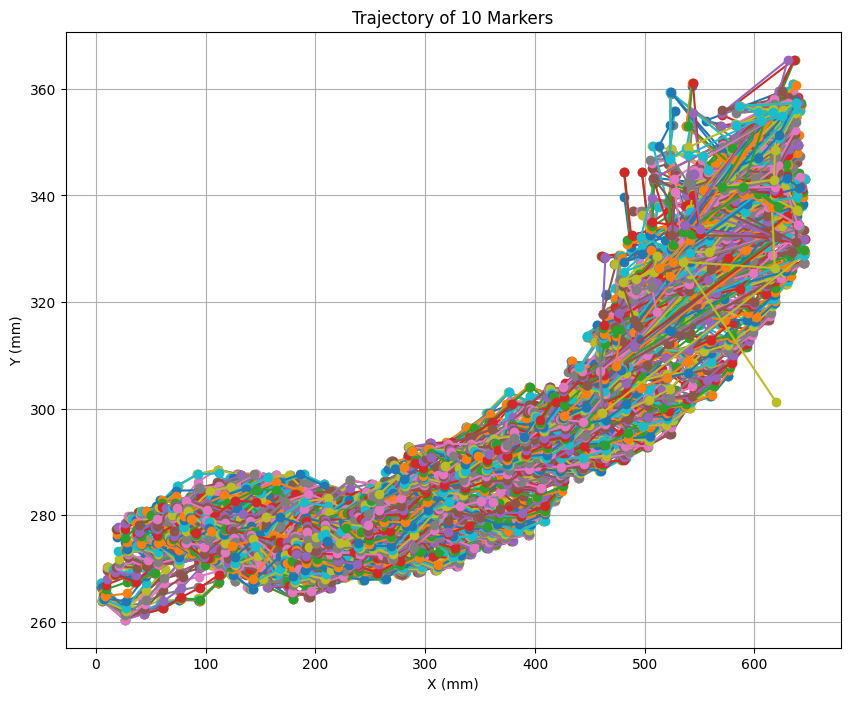

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the new CSV file
file_path = '/Users/jamesxu/Downloads/tracking/40cm/videos/10joints_40cm_1.21Hz_compressedDLC_resnet50_semi_2Sep26shuffle1_100000_filtered.csv'
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for the markers
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns[:20]].astype(float)  # Assuming first 20 columns are x, y for 10 markers

# Separate the x and y coordinates
x_coords = coordinates_df.iloc[:, ::2]  # All x-coordinates (every second column)
y_coords = coordinates_df.iloc[:, 1::2]  # All y-coordinates (every second column starting from index 1)

# Plot the trajectories of all markers
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the lines connecting all markers
for i in range(x_coords.shape[0]):
    ax.plot(x_coords.iloc[i, :], y_coords.iloc[i, :], marker='o')

# Add labels and title
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_title('Trajectory of 10 Markers')
ax.grid(True)

# Show the plot
plt.show()


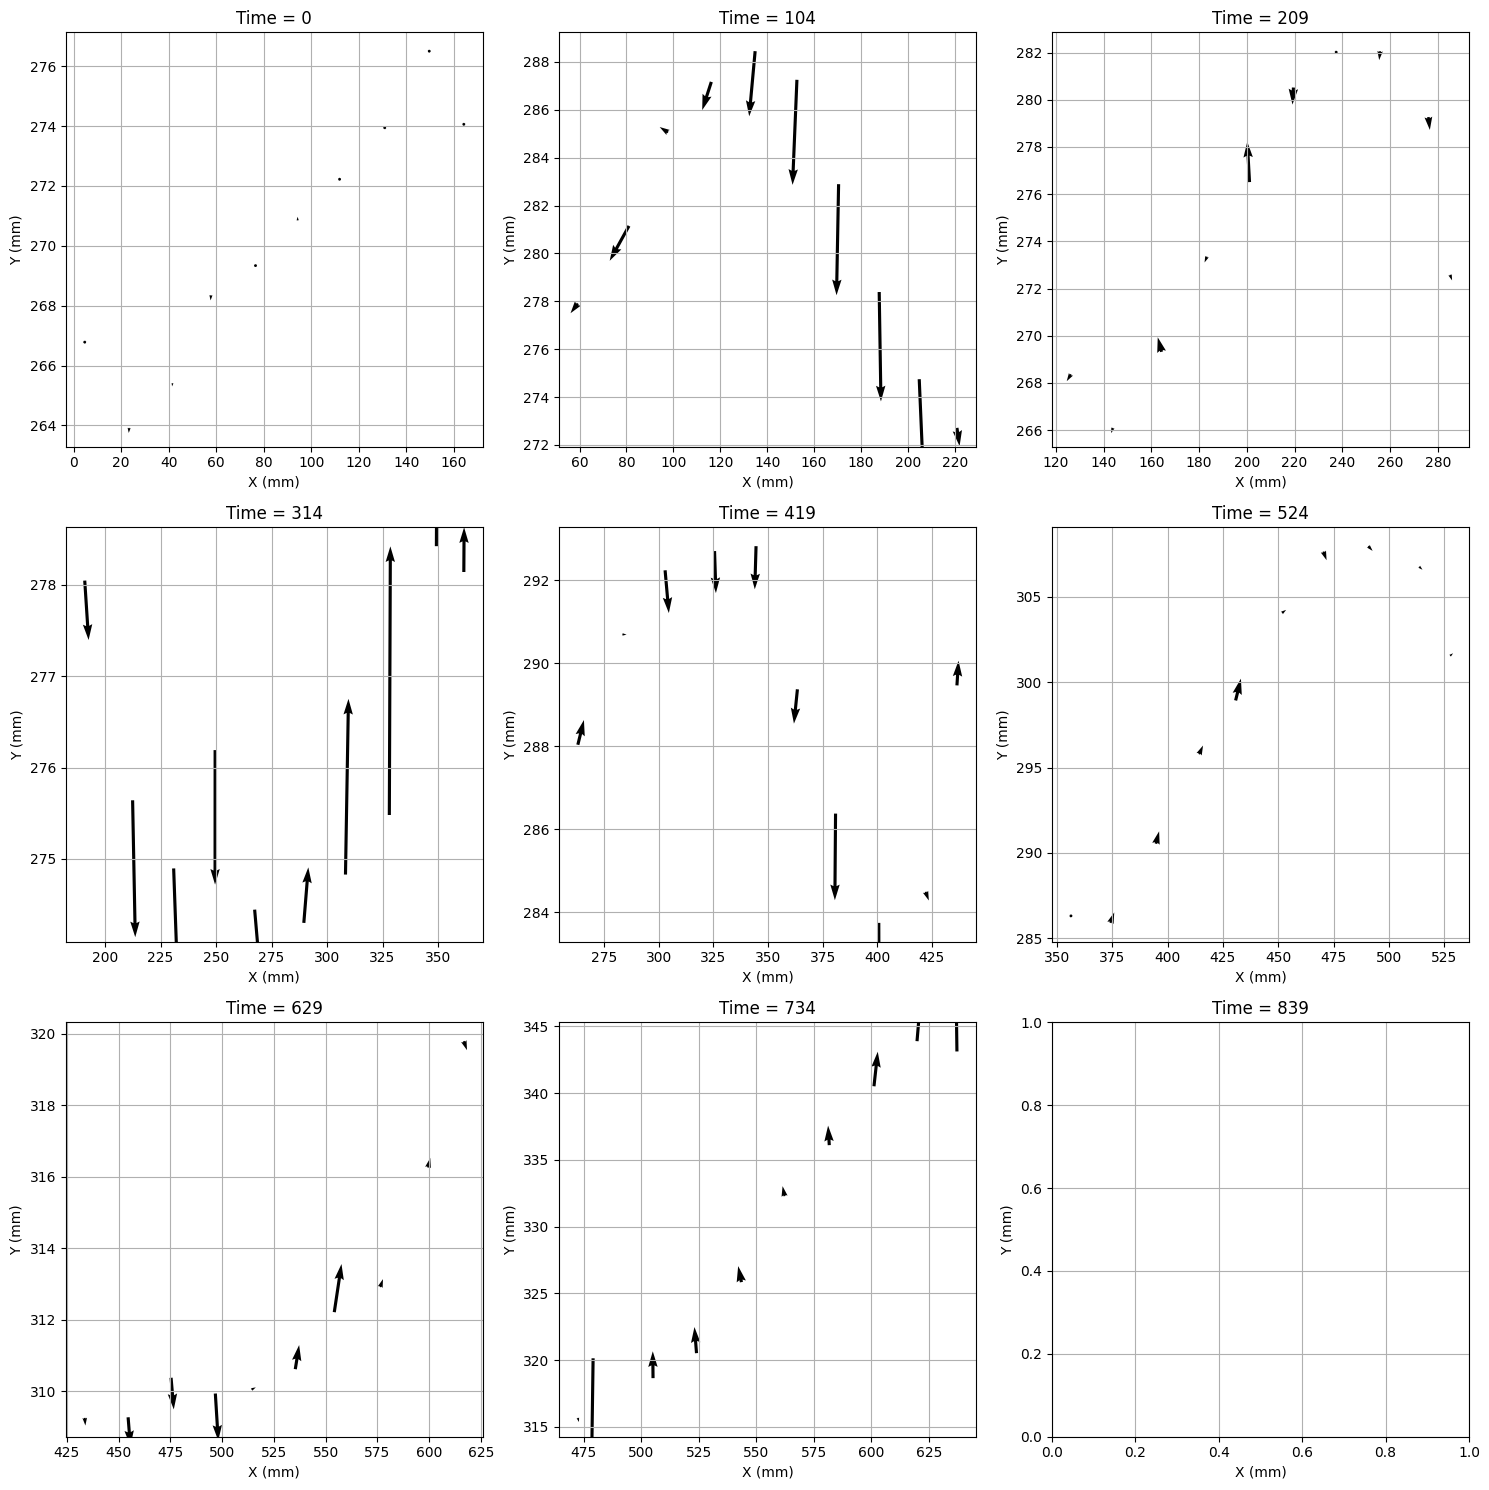

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the new CSV file
file_path = '/Users/jamesxu/Downloads/tracking/40cm/videos/10joints_40cm_1.21Hz_compressedDLC_resnet50_semi_2Sep26shuffle1_100000.csv'
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for the markers
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns[:20]].astype(float)  # Assuming first 20 columns are x, y for 10 markers

# Separate the x and y coordinates
x_coords = coordinates_df.iloc[:, ::2]  # All x-coordinates (every second column)
y_coords = coordinates_df.iloc[:, 1::2]  # All y-coordinates (every second column starting from index 1)

# Define the number of time points to sample (9 points)
num_points = 9
time_indices = np.linspace(0, len(x_coords)-1, num_points, dtype=int)  # Evenly spaced indices

# Create a 3x3 grid for subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Plot quiver plot for each time point
for idx, time_idx in enumerate(time_indices):
    ax = axs[idx // 3, idx % 3]  # Access each subplot in the 3x3 grid

    # Get current and next frame coordinates for velocity calculation
    if time_idx < len(x_coords) - 1:
        x_current = x_coords.iloc[time_idx, :]
        y_current = y_coords.iloc[time_idx, :]
        x_next = x_coords.iloc[time_idx + 1, :]
        y_next = y_coords.iloc[time_idx + 1, :]

        # Compute velocity as difference between next and current coordinates
        u = x_next - x_current
        v = y_next - y_current

        # Plot the quiver (velocity vectors)
        ax.quiver(x_current, y_current, u, v, angles='xy', scale_units='xy', scale=1)

    ax.set_title(f'Time = {time_idx}')
    ax.set_xlabel('X (mm)')
    ax.set_ylabel('Y (mm)')
    ax.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


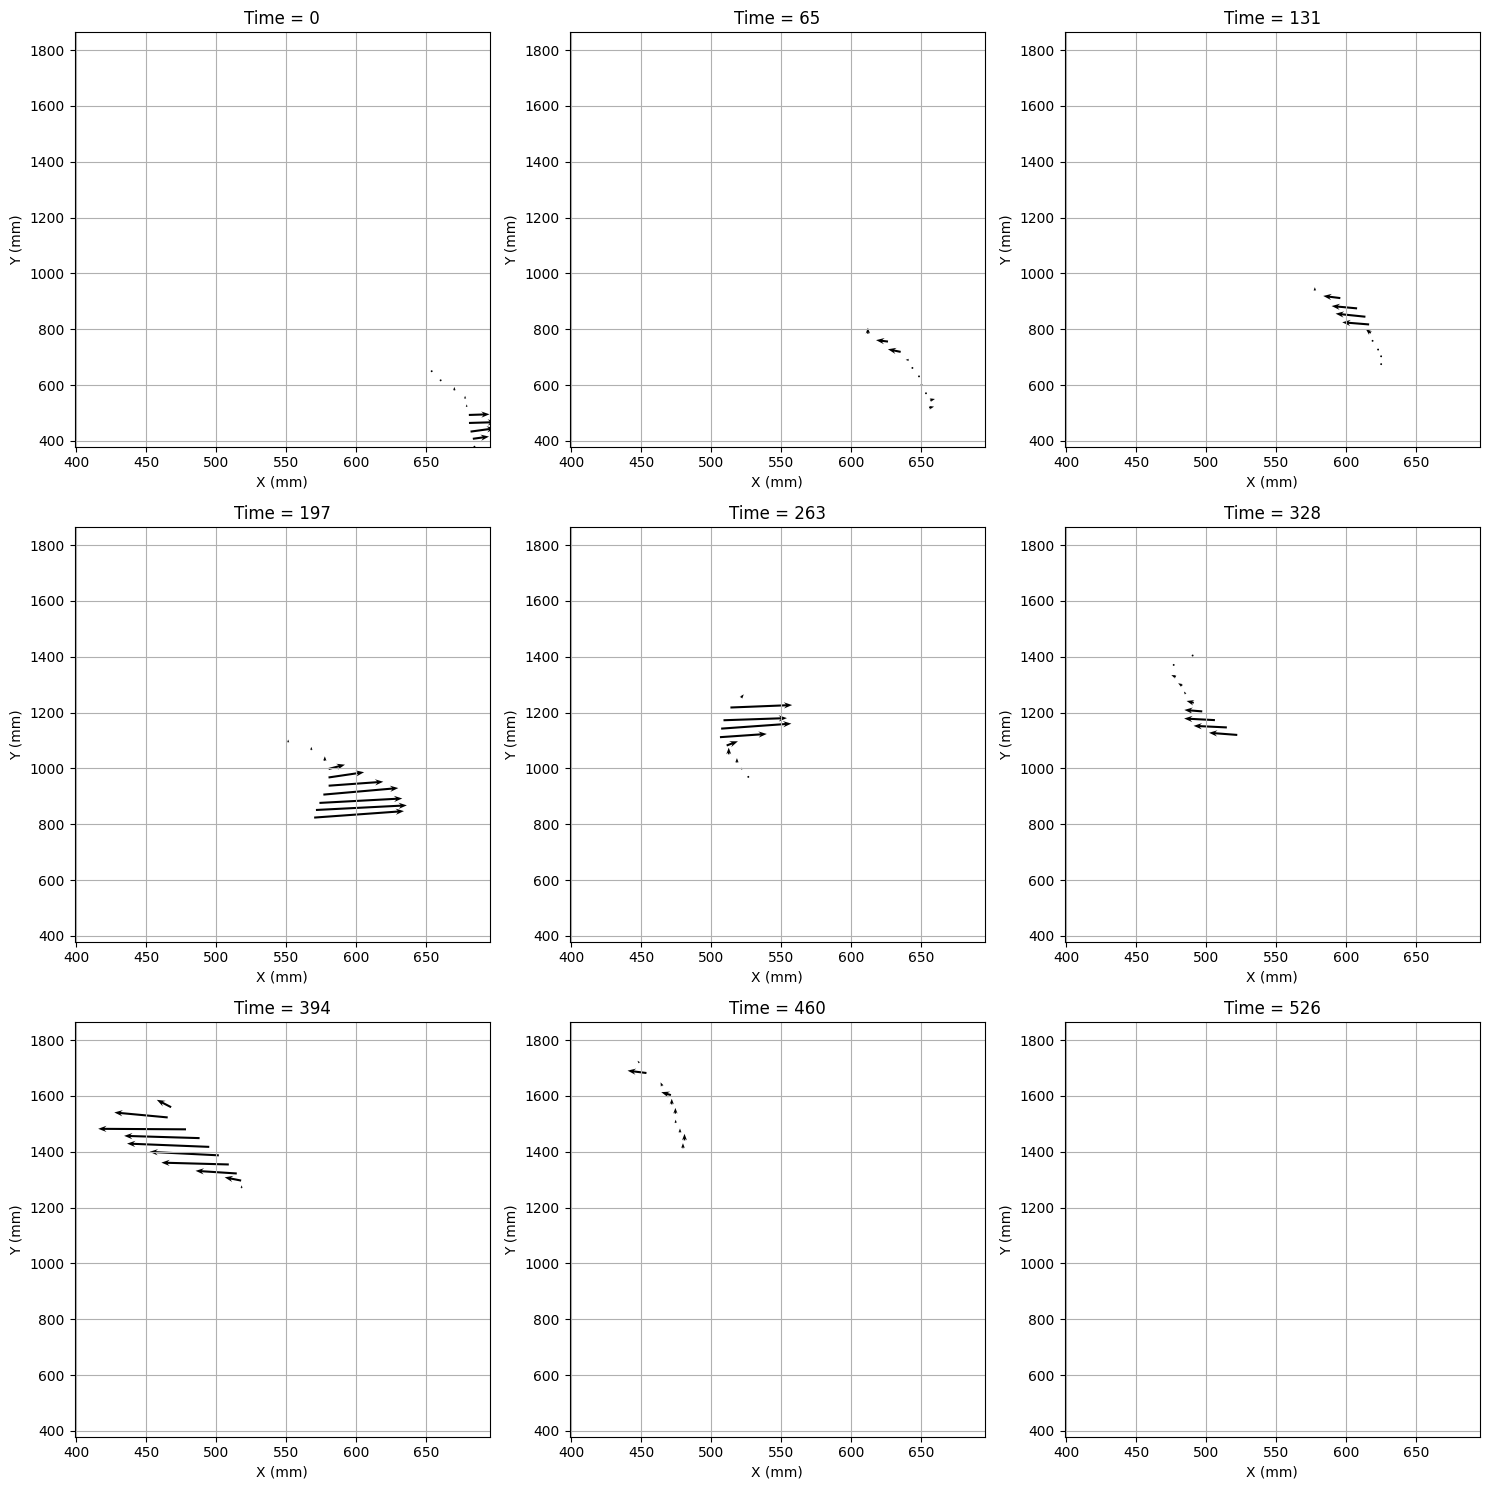

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the new CSV file
file_path = '/Users/jamesxu/Downloads/test_40cm/40cm_run3DLC_resnet50_40cm_newOct1shuffle1_100000_filtered.csv'
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for the markers
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns[:20]].astype(float)  # Assuming first 20 columns are x, y for 10 markers

# Separate the x and y coordinates
x_coords = coordinates_df.iloc[:, ::2]  # All x-coordinates (every second column)
y_coords = coordinates_df.iloc[:, 1::2]  # All y-coordinates (every second column starting from index 1)

# Define the number of time points to sample (9 points)
num_points = 9
time_indices = np.linspace(0, len(x_coords)-1, num_points, dtype=int)  # Evenly spaced indices

# Get global min and max values for x and y to fix axis limits
x_min, x_max = x_coords.min().min(), x_coords.max().max()
y_min, y_max = y_coords.min().min(), y_coords.max().max()

# Create a 3x3 grid for subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Plot quiver plot for each time point
for idx, time_idx in enumerate(time_indices):
    ax = axs[idx // 3, idx % 3]  # Access each subplot in the 3x3 grid

    # Get current and next frame coordinates for velocity calculation
    if time_idx < len(x_coords) - 1:
        x_current = x_coords.iloc[time_idx, :]
        y_current = y_coords.iloc[time_idx, :]
        x_next = x_coords.iloc[time_idx + 1, :]
        y_next = y_coords.iloc[time_idx + 1, :]

        # Compute velocity as difference between next and current coordinates
        u = x_next - x_current
        v = y_next - y_current

        # Plot the quiver (velocity vectors)
        ax.quiver(x_current, y_current, u, v, angles='xy', scale_units='xy', scale=0.2, width=0.005, headlength=4, headaxislength=3)

    # Fix the axis limits for all subplots
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.set_title(f'Time = {time_idx}')
    ax.set_xlabel('X (mm)')
    ax.set_ylabel('Y (mm)')
    ax.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


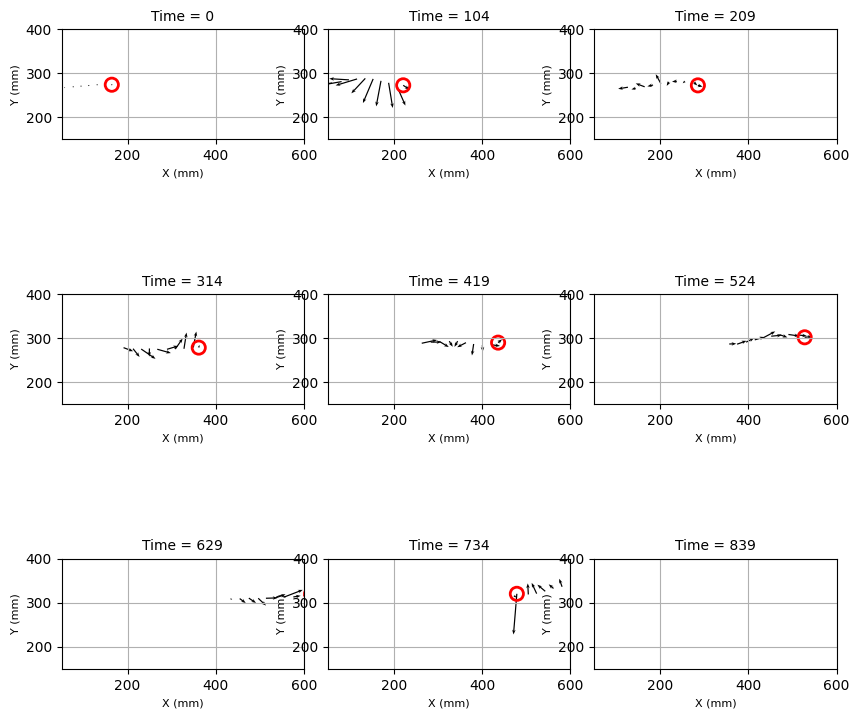

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the new CSV file
file_path = '/Users/jamesxu/Downloads/tracking/40cm/videos/10joints_40cm_1.21Hz_compressedDLC_resnet50_semi_2Sep26shuffle1_100000.csv'
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for the markers
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns[:20]].astype(float)  # Assuming first 20 columns are x, y for 10 markers

# Separate the x and y coordinates
x_coords = coordinates_df.iloc[:, ::2]  # All x-coordinates (every second column)
y_coords = coordinates_df.iloc[:, 1::2]  # All y-coordinates (every second column starting from index 1)

# Define the number of time points to sample (9 points)
num_points = 9
time_indices = np.linspace(0, len(x_coords)-1, num_points, dtype=int)  # Evenly spaced indices

# Adjust figure size to make the subplots more square and balanced
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Plot quiver plot for each time point
for idx, time_idx in enumerate(time_indices):
    ax = axs[idx // 3, idx % 3]  # Access each subplot in the 3x3 grid

    # Get current and next frame coordinates for velocity calculation
    if time_idx < len(x_coords) - 1:
        x_current = x_coords.iloc[time_idx, :]
        y_current = y_coords.iloc[time_idx, :]
        x_next = x_coords.iloc[time_idx + 1, :]
        y_next = y_coords.iloc[time_idx + 1, :]

        # Compute velocity as difference between next and current coordinates
        u = x_next - x_current
        v = y_next - y_current

        # Plot the quiver (velocity vectors) with adjusted arrow size
        ax.quiver(x_current, y_current, u, v, angles='xy', scale_units='xy', scale=0.08, width=0.005, headlength=4, headaxislength=3)

        # Draw a red circle with radius 10 mm at the first marker
        circle = patches.Circle((x_current.iloc[0], y_current.iloc[0]), 15, color='red', fill=False, linewidth=2)
        ax.add_patch(circle)

    # Set axis limits to zoom in on the region of interest
    ax.set_xlim(50, 600)
    ax.set_ylim(150, 400)
    
    # Set equal aspect ratio for proper scaling
    ax.set_aspect('equal')

    ax.set_title(f'Time = {time_idx}', fontsize=10)
    ax.set_xlabel('X (mm)', fontsize=8)
    ax.set_ylabel('Y (mm)', fontsize=8)
    ax.grid(True)

# Adjust layout to reduce subplot spacing and make the plots more balanced
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Show the plot
plt.show()


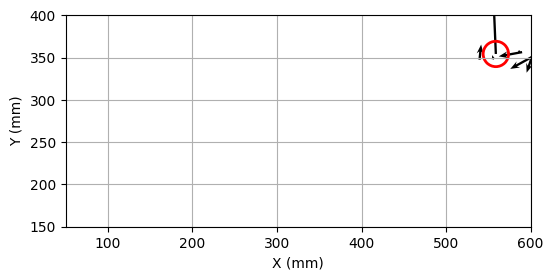

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation

# Load the new CSV file
file_path = '/Users/jamesxu/Downloads/tracking/40cm/videos/10joints_40cm_1.21Hz_compressedDLC_resnet50_semi_2Sep26shuffle1_100000.csv'
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for the markers
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns[:20]].astype(float)  # Assuming first 20 columns are x, y for 10 markers

# Separate the x and y coordinates
x_coords = coordinates_df.iloc[:, ::2]  # All x-coordinates (every second column)
y_coords = coordinates_df.iloc[:, 1::2]  # All y-coordinates (every second column starting from index 1)

# Define figure and axis for the animation
fig, ax = plt.subplots(figsize=(6, 6))

# Initial plot settings
ax.set_xlim(50, 600)
ax.set_ylim(150, 400)
ax.set_aspect('equal')
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.grid(True)

# Initialize quiver plot with initial data
x_current = x_coords.iloc[0, :]
y_current = y_coords.iloc[0, :]
x_next = x_coords.iloc[1, :]
y_next = y_coords.iloc[1, :]

# Compute initial velocity vectors
u_init = x_next - x_current
v_init = y_next - y_current

# Initialize quiver plot and circle patch
quiver = ax.quiver(x_current, y_current, u_init, v_init, angles='xy', scale_units='xy', scale=0.08, width=0.005, headlength=4, headaxislength=3)
circle = patches.Circle((x_current.iloc[0], y_current.iloc[0]), 15, color='red', fill=False, linewidth=2)
ax.add_patch(circle)

# Animation update function
def update_quiver(frame):
    x_current = x_coords.iloc[frame, :]
    y_current = y_coords.iloc[frame, :]
    
    if frame < len(x_coords) - 1:
        x_next = x_coords.iloc[frame + 1, :]
        y_next = y_coords.iloc[frame + 1, :]

        # Update the quiver with new velocity vectors
        u = x_next - x_current
        v = y_next - y_current
        quiver.set_offsets(np.c_[x_current, y_current])
        quiver.set_UVC(u, v)
        
        # Update the red circle's position to follow the first marker
        circle.set_center((x_current.iloc[0], y_current.iloc[0]))

    return quiver, circle

# Create animation
ani = FuncAnimation(fig, update_quiver, frames=len(x_coords)-1, interval=200, blit=True)

# Save the animation as an mp4 file
save_path = '/Users/jamesxu/Downloads/tracking/40cm/videos/trajectory_animation.mp4'
ani.save(save_path, writer='ffmpeg', dpi=300)

# If you want to save it as a gif instead, uncomment the following line:
# ani.save('/Users/jamesxu/Downloads/tracking/40cm/videos/trajectory_animation.gif', writer='imagemagick', dpi=300)

# Display the animation
plt.show()


ValueError: x and y must have same first dimension, but have shapes (700,) and (600,)

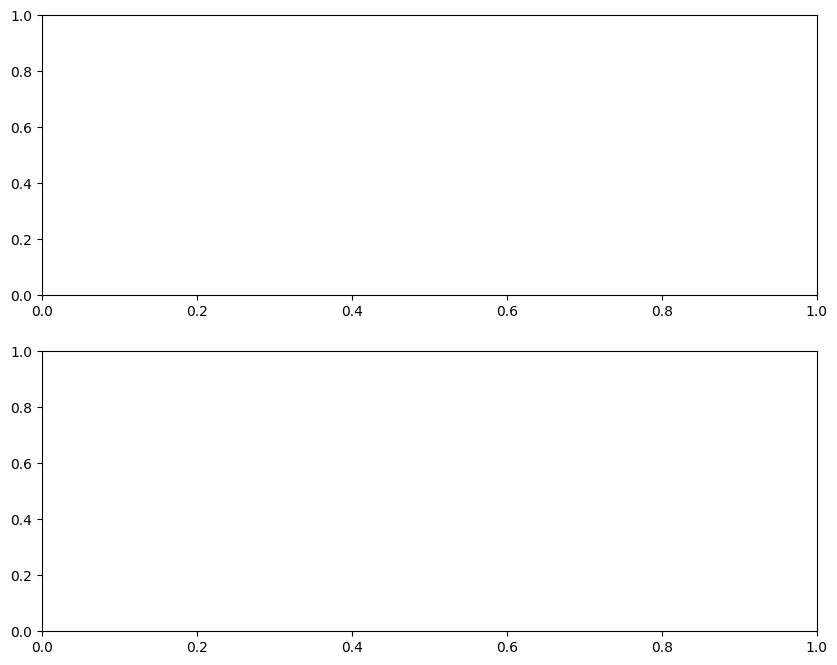

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the new CSV file
file_path = '/Users/jamesxu/Downloads/tracking/40cm/videos/10joints_40cm_1.21Hz_compressedDLC_resnet50_semi_2Sep26shuffle1_100000.csv'
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for the markers
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns[:20]].astype(float)  # Assuming first 20 columns are x, y for 10 markers

# Separate the x and y coordinates for marker 1 (first marker)
x_marker_1 = coordinates_df.iloc[:, 0]  # X-coordinate of marker 1
y_marker_1 = coordinates_df.iloc[:, 1]  # Y-coordinate of marker 1

# Create time array (assuming constant time intervals, adjust if needed)
time = np.arange(0, len(x_marker_1))  # Replace with actual time values if available

# Keep only the first 600 frames
x_marker_1 = x_marker_1[:600]
y_marker_1 = y_marker_1[:600]
time = time[:600]

# Calculate velocity as the difference in position between consecutive time points
velocity_x = np.diff(x_marker_1)  # Velocity in the x direction
velocity_y = np.diff(y_marker_1)  # Velocity in the y direction
velocity = np.sqrt(velocity_x**2 + velocity_y**2)  # Magnitude of velocity

# Create a subplot with 2 rows: one for position vs time, one for velocity vs time
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot position vs time
axs[0].plot(time, x_marker_1, label='X position', color='b')
axs[0].plot(time, y_marker_1, label='Y position', color='r')
axs[0].set_title('Position vs Time for Marker 1 (first 600 frames)')
axs[0].set_xlabel('Time (frames)')
axs[0].set_ylabel('Position (mm)')
axs[0].legend()
axs[0].grid(True)

# Plot velocity vs time (shift time by one because of the diff operation)
time_velocity = time[1:]  # Time array for velocity, since it's one element shorter
axs[1].plot(time_velocity, velocity, label='Velocity', color='g')
axs[1].set_title('Velocity vs Time for Marker 1 (first 600 frames)')
axs[1].set_xlabel('Time (frames)')
axs[1].set_ylabel('Velocity (mm/frame)')
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


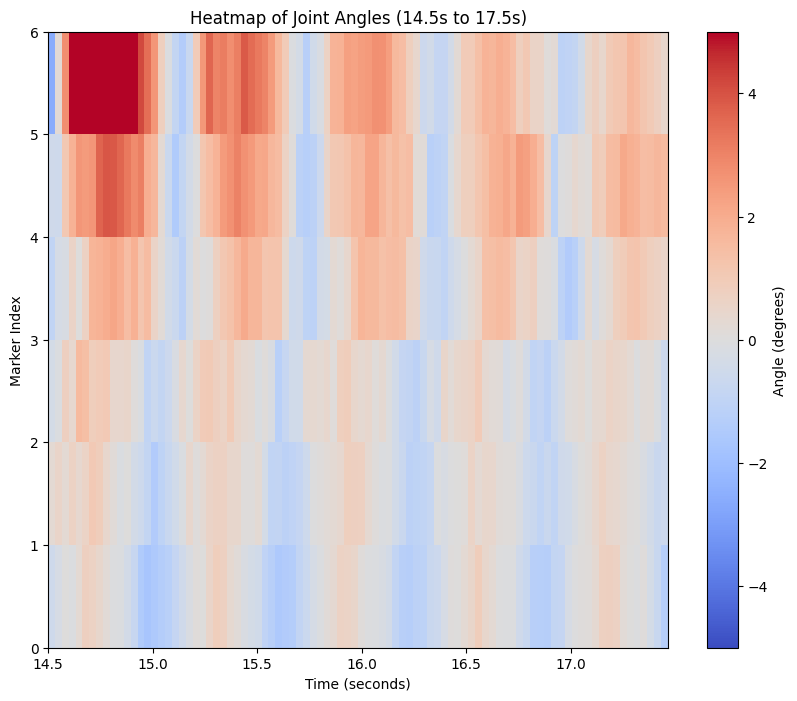

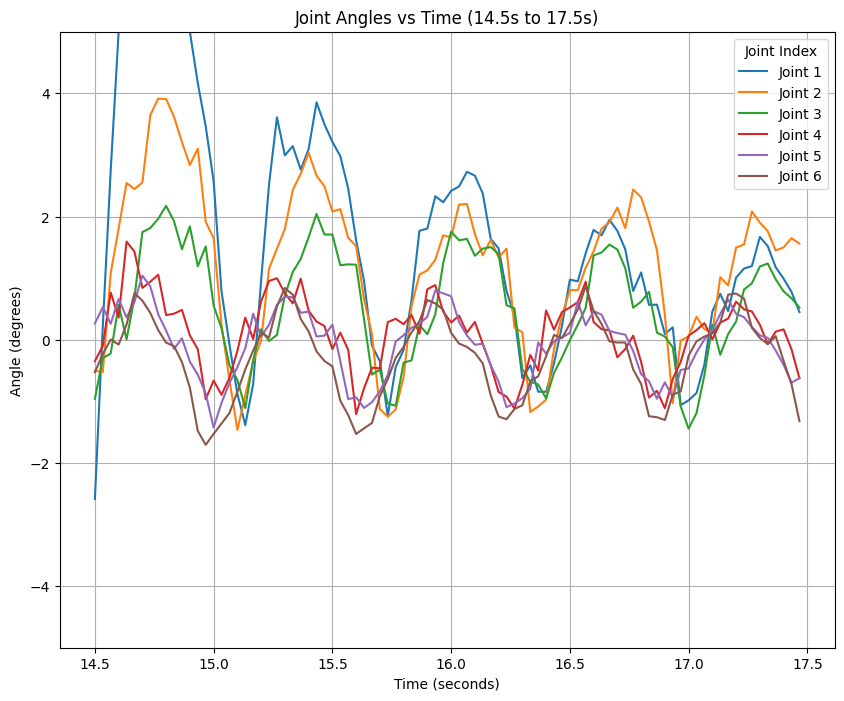

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/jamesxu/Desktop/swimming centipede/video_1DLC_resnet50_centi_swimSep5shuffle1_100000.csv'  # Update this with the path to your file
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for each marker
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns].astype(float)

# Limit to the first 20 seconds (600 frames)
frame_rate = 30
num_frames = 20 * frame_rate  # 20 seconds of data
coordinates_df = coordinates_df.head(num_frames)

# Define the time window (14.5 to 17.5 seconds)
start_time = 14.5
end_time = 17.5

# Convert the time window to frames
start_frame = int(start_time * frame_rate)
end_frame = int(end_time * frame_rate)

# Extract the relevant frames for the time window
coordinates_df_window = coordinates_df.iloc[start_frame:end_frame]

# Calculate angles for the selected time window using every 3 consecutive markers (forming tangent angles)
angles_window = []

for i in range(len(coordinate_columns) // 2 - 2):  # Loop through triples of consecutive markers
    # Get the vectors from marker i to i+1 and i+1 to i+2
    vec1_x = coordinates_df_window.iloc[:, 2*i+1].values - coordinates_df_window.iloc[:, 2*i].values
    vec1_y = coordinates_df_window.iloc[:, 2*i+2].values - coordinates_df_window.iloc[:, 2*i+1].values
    vec2_x = coordinates_df_window.iloc[:, 2*i+3].values - coordinates_df_window.iloc[:, 2*i+2].values
    vec2_y = coordinates_df_window.iloc[:, 2*i+4].values - coordinates_df_window.iloc[:, 2*i+3].values
    
    # Compute the cross product to determine the sign of the angle
    cross_product = vec1_x * vec2_y - vec1_y * vec2_x
    
    # Compute the angles between the vectors using dot product and magnitude
    dot_product = vec1_x * vec2_x + vec1_y * vec2_y
    magnitude1 = np.sqrt(vec1_x**2 + vec1_y**2)
    magnitude2 = np.sqrt(vec2_x**2 + vec2_y**2)
    
    # Cosine of the angle
    cos_theta = dot_product / (magnitude1 * magnitude2)
    
    # Ensure no invalid values due to floating-point precision
    cos_theta = np.clip(cos_theta, -1, 1)
    
    # Calculate the angle in degrees
    angle = np.degrees(np.arccos(cos_theta))
    
    # Use the cross product to determine the sign of the angle
    angle = np.where(cross_product < 0, -angle, angle)
    
    # Make sure the angles are between -5° and 5°
    filtered_angle = np.clip(angle, -5, 5)
    
    angles_window.append(filtered_angle)

# Convert to a numpy array for easier manipulation
angles_window = np.array(angles_window)

# Time axis: convert frames to seconds
time_axis_window = np.arange(angles_window.shape[1]) / frame_rate + start_time

# Plot the heatmap for the selected time window
plt.figure(figsize=(10, 8))
plt.imshow(angles_window, aspect='auto', cmap='coolwarm', extent=[time_axis_window.min(), time_axis_window.max(), 0, angles_window.shape[0]])
plt.colorbar(label='Angle (degrees)')
plt.clim(-5, 5)
plt.xlabel('Time (seconds)')
plt.ylabel('Marker Index')
plt.title('Heatmap of Joint Angles (14.5s to 17.5s)')
plt.show()

# Plot the angles for all joints for the selected time window
plt.figure(figsize=(10, 8))

for i in range(angles_window.shape[0]):  # Loop through each joint's angles
    plt.plot(time_axis_window, angles_window[i], label=f'Joint {i+1}')

plt.xlabel('Time (seconds)')
plt.ylabel('Angle (degrees)')
plt.title('Joint Angles vs Time (14.5s to 17.5s)')
plt.ylim(-5, 5)
plt.grid(True)
plt.legend(title="Joint Index")
plt.show()


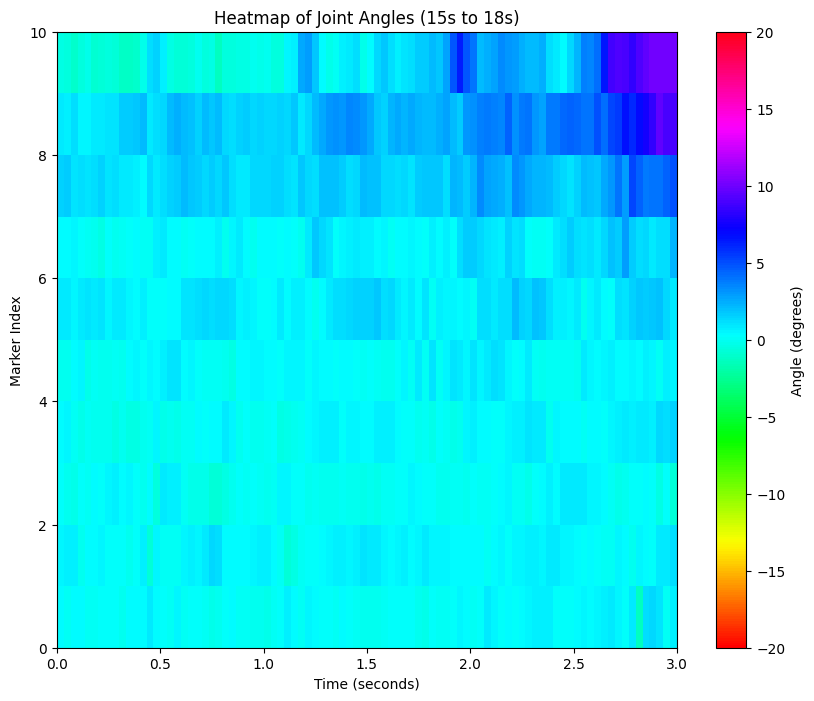

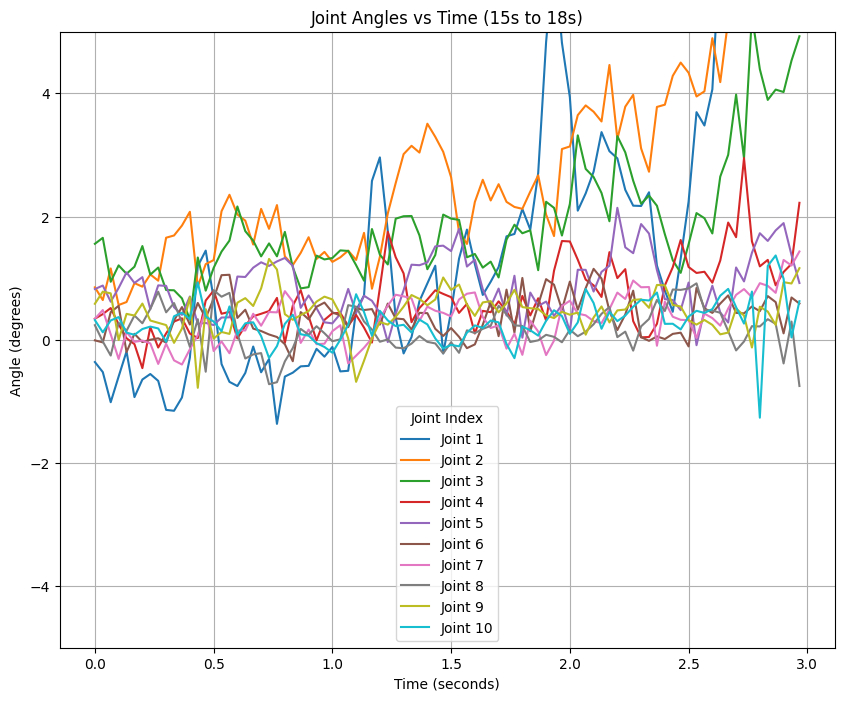

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/jamesxu/Downloads/tracking/40cm/videos/10joints_40cm_1.21Hz_compressedDLC_resnet50_semi_2Sep26shuffle1_100000.csv'  # Update this with the path to your file
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for each marker
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns].astype(float)

# Define the time window (15 to 18 seconds)
frame_rate = 30
start_time = 3
end_time = 6

# Convert the time window to frames
start_frame = int(start_time * frame_rate)
end_frame = int(end_time * frame_rate)

# Extract the relevant frames for the time window
coordinates_df_window = coordinates_df.iloc[start_frame:end_frame]

# Calculate angles for the selected time window using every 3 consecutive markers (forming tangent angles)
angles_window = []

for i in range(len(coordinate_columns) // 2 - 2):  # Loop through triples of consecutive markers
    # Get the vectors from marker i to i+1 and i+1 to i+2
    vec1_x = coordinates_df_window.iloc[:, 2*i+1].values - coordinates_df_window.iloc[:, 2*i].values
    vec1_y = coordinates_df_window.iloc[:, 2*i+2].values - coordinates_df_window.iloc[:, 2*i+1].values
    vec2_x = coordinates_df_window.iloc[:, 2*i+3].values - coordinates_df_window.iloc[:, 2*i+2].values
    vec2_y = coordinates_df_window.iloc[:, 2*i+4].values - coordinates_df_window.iloc[:, 2*i+3].values
    
    # Compute the cross product to determine the sign of the angle
    cross_product = vec1_x * vec2_y - vec1_y * vec2_x
    
    # Compute the angles between the vectors using dot product and magnitude
    dot_product = vec1_x * vec2_x + vec1_y * vec2_y
    magnitude1 = np.sqrt(vec1_x**2 + vec1_y**2)
    magnitude2 = np.sqrt(vec2_x**2 + vec2_y**2)
    
    # Cosine of the angle
    cos_theta = dot_product / (magnitude1 * magnitude2)
    
    # Ensure no invalid values due to floating-point precision
    cos_theta = np.clip(cos_theta, -1, 1)
    
    # Calculate the angle in degrees
    angle = np.degrees(np.arccos(cos_theta))
    
    # Use the cross product to determine the sign of the angle
    angle = np.where(cross_product < 0, -angle, angle)
    
    # Make sure the angles are between -5° and 5°
    filtered_angle = np.clip(angle, -10, 10)
    
    angles_window.append(filtered_angle)

# Convert to a numpy array for easier manipulation
angles_window = np.array(angles_window)

# Time axis: convert frames to seconds
time_axis_window = np.arange(angles_window.shape[1]) / frame_rate

# Relabel x-axis from 0 to 3 seconds
time_axis_window = time_axis_window - time_axis_window[0]

# Plot the heatmap for the selected time window
plt.figure(figsize=(10, 8))
plt.imshow(angles_window, aspect='auto', cmap='hsv', extent=[0, 3, 0, angles_window.shape[0]])
plt.colorbar(label='Angle (degrees)')
plt.clim(-20,20 )
plt.xlabel('Time (seconds)')
plt.ylabel('Marker Index')
plt.title('Heatmap of Joint Angles (15s to 18s)')
plt.show()

# Plot the angles for all joints for the selected time window
plt.figure(figsize=(10, 8))

for i in range(angles_window.shape[0]):  # Loop through each joint's angles
    plt.plot(time_axis_window, angles_window[i], label=f'Joint {i+1}')

plt.xlabel('Time (seconds)')
plt.ylabel('Angle (degrees)')
plt.title('Joint Angles vs Time (15s to 18s)')
plt.ylim(-5, 5)
plt.grid(True)
plt.legend(title="Joint Index")
plt.show()


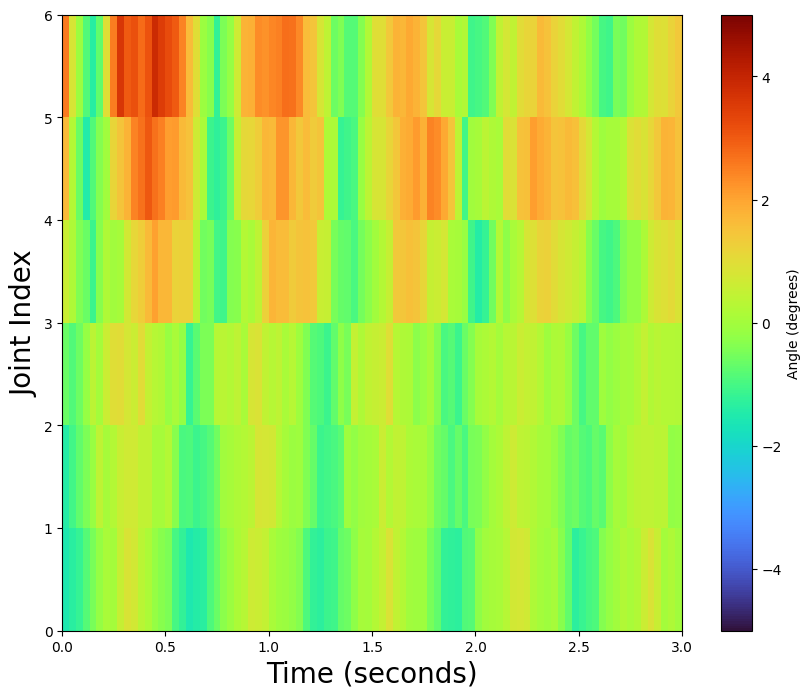

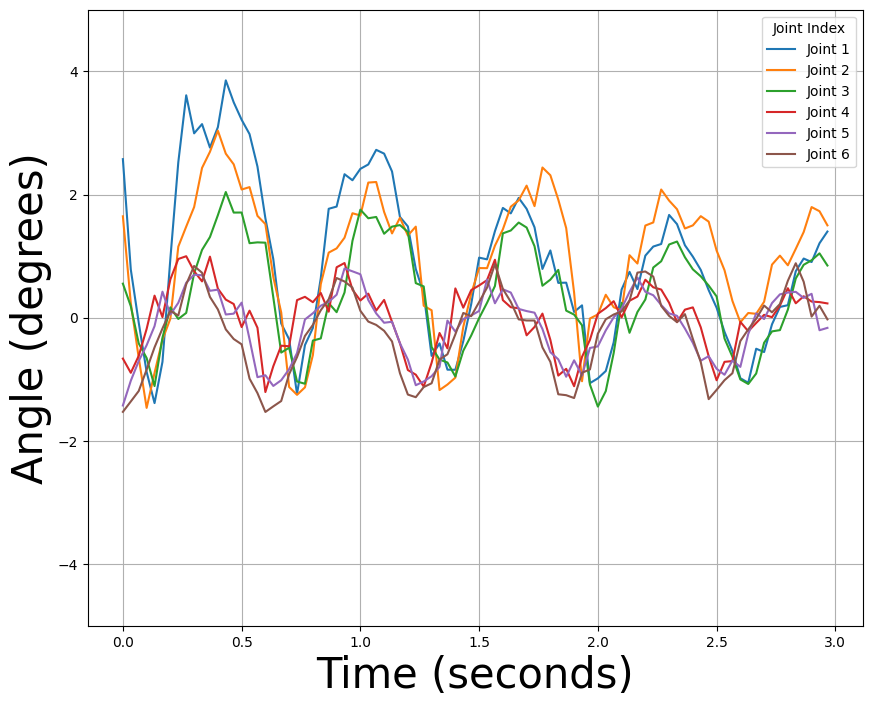

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/jamesxu/Desktop/swimming centipede/video_1DLC_resnet50_centi_swimSep5shuffle1_100000.csv'  # Update this with the path to your file
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for each marker
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns].astype(float)

# Define the time window (15 to 18 seconds)
frame_rate = 30
start_time = 15
end_time = 18

# Convert the time window to frames
start_frame = int(start_time * frame_rate)
end_frame = int(end_time * frame_rate)

# Extract the relevant frames for the time window
coordinates_df_window = coordinates_df.iloc[start_frame:end_frame]

# Calculate angles for the selected time window using every 3 consecutive markers (forming tangent angles)
angles_window = []

for i in range(len(coordinate_columns) // 2 - 2):  # Loop through triples of consecutive markers
    # Get the vectors from marker i to i+1 and i+1 to i+2
    vec1_x = coordinates_df_window.iloc[:, 2*i+1].values - coordinates_df_window.iloc[:, 2*i].values
    vec1_y = coordinates_df_window.iloc[:, 2*i+2].values - coordinates_df_window.iloc[:, 2*i+1].values
    vec2_x = coordinates_df_window.iloc[:, 2*i+3].values - coordinates_df_window.iloc[:, 2*i+2].values
    vec2_y = coordinates_df_window.iloc[:, 2*i+4].values - coordinates_df_window.iloc[:, 2*i+3].values
    
    # Compute the cross product to determine the sign of the angle
    cross_product = vec1_x * vec2_y - vec1_y * vec2_x
    
    # Compute the angles between the vectors using dot product and magnitude
    dot_product = vec1_x * vec2_x + vec1_y * vec2_y
    magnitude1 = np.sqrt(vec1_x**2 + vec1_y**2)
    magnitude2 = np.sqrt(vec2_x**2 + vec2_y**2)
    
    # Cosine of the angle
    cos_theta = dot_product / (magnitude1 * magnitude2)
    
    # Ensure no invalid values due to floating-point precision
    cos_theta = np.clip(cos_theta, -1, 1)
    
    # Calculate the angle in degrees
    angle = np.degrees(np.arccos(cos_theta))
    
    # Use the cross product to determine the sign of the angle
    angle = np.where(cross_product < 0, -angle, angle)
    
    # Make sure the angles are between -5° and 5°
    filtered_angle = np.clip(angle, -5, 5)
    
    angles_window.append(filtered_angle)

# Convert to a numpy array for easier manipulation
angles_window = np.array(angles_window)

# Time axis: convert frames to seconds
time_axis_window = np.arange(angles_window.shape[1]) / frame_rate

# Relabel x-axis from 0 to 3 seconds
time_axis_window = time_axis_window - time_axis_window[0]

# Plot the heatmap for the selected time window
plt.figure(figsize=(10, 8))
plt.imshow(angles_window, aspect='auto', cmap='turbo', extent=[0, 3, 0, angles_window.shape[0]])
plt.colorbar(label='Angle (degrees)')
plt.clim(-5, 5)
plt.xlabel('Time (seconds)',fontsize=20)
plt.ylabel('Joint Index',fontsize=20)
# plt.title('Heatmap of Joint Angles (15s to 18s)')
plt.show()

# Plot the angles for all joints for the selected time window
plt.figure(figsize=(10, 8))

for i in range(angles_window.shape[0]):  # Loop through each joint's angles
    plt.plot(time_axis_window, angles_window[i], label=f'Joint {i+1}')

plt.xlabel('Time (seconds)', fontsize=30)
plt.ylabel('Angle (degrees)', fontsize=30)
plt.ylim(-5, 5)
plt.grid(True)
plt.legend(title="Joint Index")
plt.show()


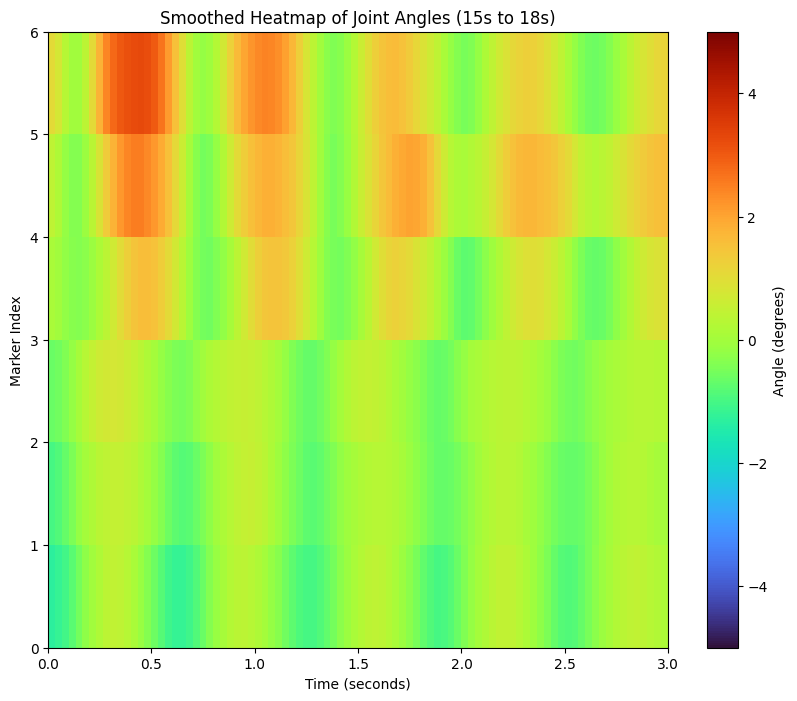

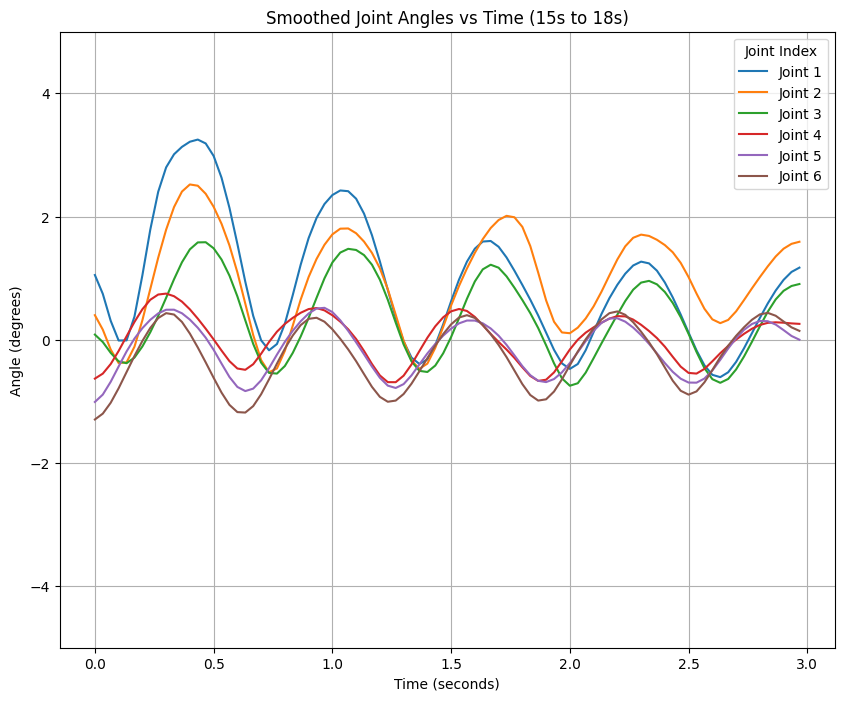

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Load the CSV file
file_path = '/Users/jamesxu/Desktop/swimming centipede/video_1DLC_resnet50_centi_swimSep5shuffle1_100000.csv'  # Update this with the path to your file
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for each marker
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns].astype(float)

# Define the time window (15 to 18 seconds)
frame_rate = 30
start_time = 15
end_time = 18

# Convert the time window to frames
start_frame = int(start_time * frame_rate)
end_frame = int(end_time * frame_rate)

# Extract the relevant frames for the time window
coordinates_df_window = coordinates_df.iloc[start_frame:end_frame]

# Calculate angles for the selected time window using every 3 consecutive markers (forming tangent angles)
angles_window = []

for i in range(len(coordinate_columns) // 2 - 2):  # Loop through triples of consecutive markers
    # Get the vectors from marker i to i+1 and i+1 to i+2
    vec1_x = coordinates_df_window.iloc[:, 2*i+1].values - coordinates_df_window.iloc[:, 2*i].values
    vec1_y = coordinates_df_window.iloc[:, 2*i+2].values - coordinates_df_window.iloc[:, 2*i+1].values
    vec2_x = coordinates_df_window.iloc[:, 2*i+3].values - coordinates_df_window.iloc[:, 2*i+2].values
    vec2_y = coordinates_df_window.iloc[:, 2*i+4].values - coordinates_df_window.iloc[:, 2*i+3].values
    
    # Compute the cross product to determine the sign of the angle
    cross_product = vec1_x * vec2_y - vec1_y * vec2_x
    
    # Compute the angles between the vectors using dot product and magnitude
    dot_product = vec1_x * vec2_x + vec1_y * vec2_y
    magnitude1 = np.sqrt(vec1_x**2 + vec1_y**2)
    magnitude2 = np.sqrt(vec2_x**2 + vec2_y**2)
    
    # Cosine of the angle
    cos_theta = dot_product / (magnitude1 * magnitude2)
    
    # Ensure no invalid values due to floating-point precision
    cos_theta = np.clip(cos_theta, -1, 1)
    
    # Calculate the angle in degrees
    angle = np.degrees(np.arccos(cos_theta))
    
    # Use the cross product to determine the sign of the angle
    angle = np.where(cross_product < 0, -angle, angle)
    
    # Make sure the angles are between -5° and 5°
    filtered_angle = np.clip(angle, -5, 5)
    
    angles_window.append(filtered_angle)

# Convert to a numpy array for easier manipulation
angles_window = np.array(angles_window)

# Apply Gaussian smoothing
angles_window_smoothed = gaussian_filter1d(angles_window, sigma=2, axis=1)

# Time axis: convert frames to seconds
time_axis_window = np.arange(angles_window.shape[1]) / frame_rate

# Relabel x-axis from 0 to 3 seconds
time_axis_window = time_axis_window - time_axis_window[0]

# Plot the smoothed heatmap for the selected time window
plt.figure(figsize=(10, 8))
plt.imshow(angles_window_smoothed, aspect='auto', cmap='turbo', extent=[0, 3, 0, angles_window.shape[0]])
plt.colorbar(label='Angle (degrees)')
plt.clim(-5, 5)
plt.xlabel('Time (seconds)')
plt.ylabel('Marker Index')
plt.title('Smoothed Heatmap of Joint Angles (15s to 18s)')
plt.show()

# Plot the smoothed angles for all joints for the selected time window
plt.figure(figsize=(10, 8))

for i in range(angles_window_smoothed.shape[0]):  # Loop through each joint's angles
    plt.plot(time_axis_window, angles_window_smoothed[i], label=f'Joint {i+1}')

plt.xlabel('Time (seconds)')
plt.ylabel('Angle (degrees)')
plt.title('Smoothed Joint Angles vs Time (15s to 18s)')
plt.ylim(-5, 5)
plt.grid(True)
plt.legend(title="Joint Index")
plt.show()


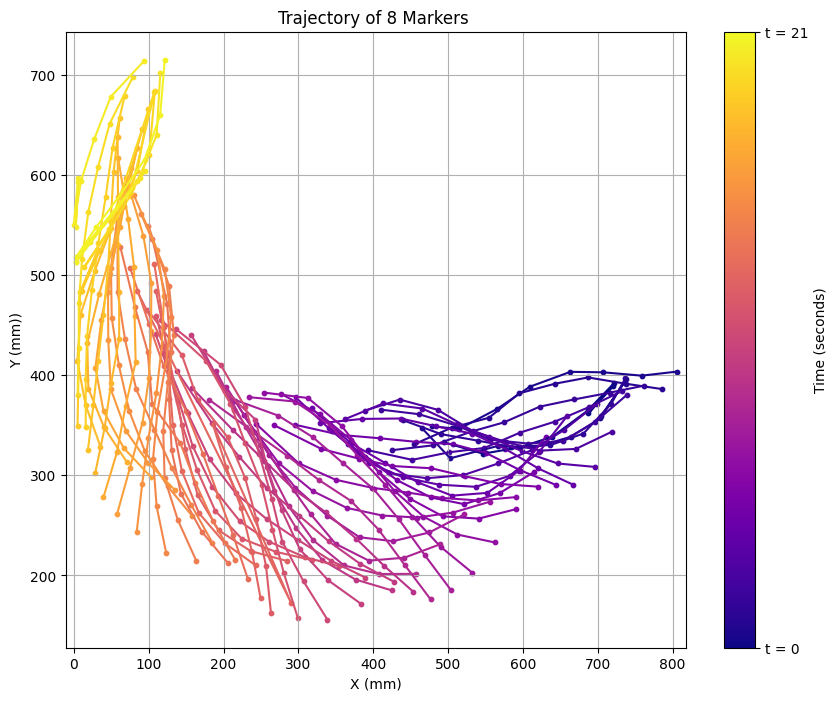

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Load the CSV file
file_path = '/Users/jamesxu/Desktop/swimming centipede/video_1DLC_resnet50_centi_swimSep5shuffle1_100000.csv'  # Update this with the path to your file
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for the 8 markers
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns[:16]].astype(float)  # Assuming first 16 columns are x, y for 8 markers

# Separate the x and y coordinates
x_coords = coordinates_df.iloc[:, ::2]  # All x-coordinates (every second column)
y_coords = coordinates_df.iloc[:, 1::2]  # All y-coordinates (every second column starting from index 1)

# Define total time (in seconds) and frame rate (assumed here)
total_time = 21  # Total duration in seconds
frame_rate = 30  # Frames per second (assumed)
total_frames = len(coordinates_df)  # Total number of frames

# Time values associated with each frame
time_values = np.linspace(0, total_time, total_frames)

# Sample every 10th trajectory to reduce overplotting
sampled_indices = np.arange(0, total_frames, 10)
sampled_times = time_values[sampled_indices]  # Get the time for sampled frames

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create a color map to represent time progression
colors = cm.plasma(np.linspace(0, 1, len(sampled_indices)))

# Plot the lines connecting all 8 markers for each sampled frame and add dots
for idx, i in enumerate(sampled_indices[:-1]):  # Skip the last to avoid out-of-range error
    ax.plot(x_coords.iloc[i, :], y_coords.iloc[i, :], color=colors[idx])
    ax.scatter(x_coords.iloc[i, :], y_coords.iloc[i, :], color=colors[idx], s=10)  # Add marker dots

# Set x-axis limits to ensure all markers are plotted
ax.set_xlim(x_coords.min().min() - 10, x_coords.max().max() + 10)

# Manually create a color bar for the time progression using actual time values
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=0, vmax=total_time))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Time (seconds)')
cbar.set_ticks([0, total_time])
cbar.set_ticklabels(['t = 0', f't = {total_time}'])

# Add labels and title
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm))')
ax.set_title('Trajectory of 8 Markers ')
ax.grid(True)

# Show the plot
plt.show()


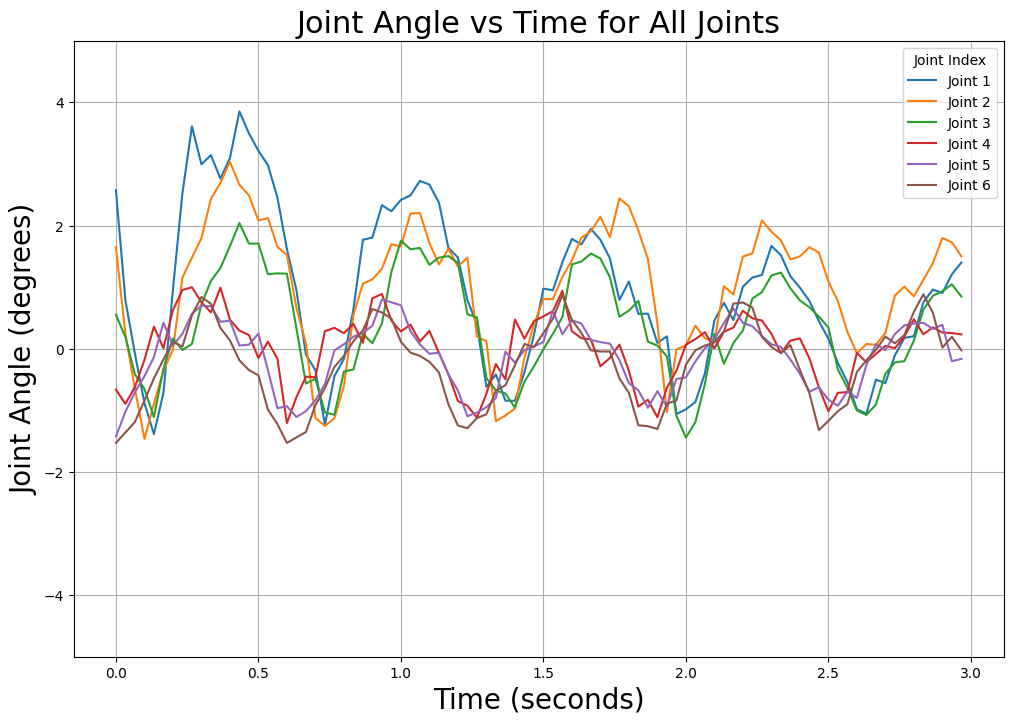

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/jamesxu/Desktop/swimming centipede/video_1DLC_resnet50_centi_swimSep5shuffle1_100000.csv'  # Update this with the path to your file
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for each marker
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns].astype(float)

# Define the time window (15 to 18 seconds)
frame_rate = 30
start_time = 15
end_time = 18

# Convert the time window to frames
start_frame = int(start_time * frame_rate)
end_frame = int(end_time * frame_rate)

# Extract the relevant frames for the time window
coordinates_df_window = coordinates_df.iloc[start_frame:end_frame]

# Calculate angles for the selected time window using every 3 consecutive markers (forming tangent angles)
angles_window = []

for i in range(len(coordinate_columns) // 2 - 2):  # Loop through triples of consecutive markers
    # Get the vectors from marker i to i+1 and i+1 to i+2
    vec1_x = coordinates_df_window.iloc[:, 2*i+1].values - coordinates_df_window.iloc[:, 2*i].values
    vec1_y = coordinates_df_window.iloc[:, 2*i+2].values - coordinates_df_window.iloc[:, 2*i+1].values
    vec2_x = coordinates_df_window.iloc[:, 2*i+3].values - coordinates_df_window.iloc[:, 2*i+2].values
    vec2_y = coordinates_df_window.iloc[:, 2*i+4].values - coordinates_df_window.iloc[:, 2*i+3].values
    
    # Compute the cross product to determine the sign of the angle
    cross_product = vec1_x * vec2_y - vec1_y * vec2_x
    
    # Compute the angles between the vectors using dot product and magnitude
    dot_product = vec1_x * vec2_x + vec1_y * vec2_y
    magnitude1 = np.sqrt(vec1_x**2 + vec1_y**2)
    magnitude2 = np.sqrt(vec2_x**2 + vec2_y**2)
    
    # Cosine of the angle
    cos_theta = dot_product / (magnitude1 * magnitude2)
    
    # Ensure no invalid values due to floating-point precision
    cos_theta = np.clip(cos_theta, -1, 1)
    
    # Calculate the angle in degrees
    angle = np.degrees(np.arccos(cos_theta))
    
    # Use the cross product to determine the sign of the angle
    angle = np.where(cross_product < 0, -angle, angle)
    
    # Make sure the angles are between -5° and 5°
    filtered_angle = np.clip(angle, -5, 5)
    
    angles_window.append(filtered_angle)

# Convert to a numpy array for easier manipulation
angles_window = np.array(angles_window)

# Time axis: convert frames to seconds
time_axis_window = np.arange(angles_window.shape[1]) / frame_rate

# Relabel x-axis from 0 to 3 seconds
time_axis_window = time_axis_window - time_axis_window[0]

# Plot the angles for all joints for the selected time window
plt.figure(figsize=(12, 8))

for i in range(angles_window.shape[0]):  # Loop through each joint's angles
    plt.plot(time_axis_window, angles_window[i], label=f'Joint {i+1}')

plt.xlabel('Time (seconds)', fontsize=20)
plt.ylabel('Joint Angle (degrees)', fontsize=20)
plt.ylim(-5, 5)
plt.title('Joint Angle vs Time for All Joints', fontsize=22)
plt.grid(True)
plt.legend(title="Joint Index", fontsize=10)
plt.show()


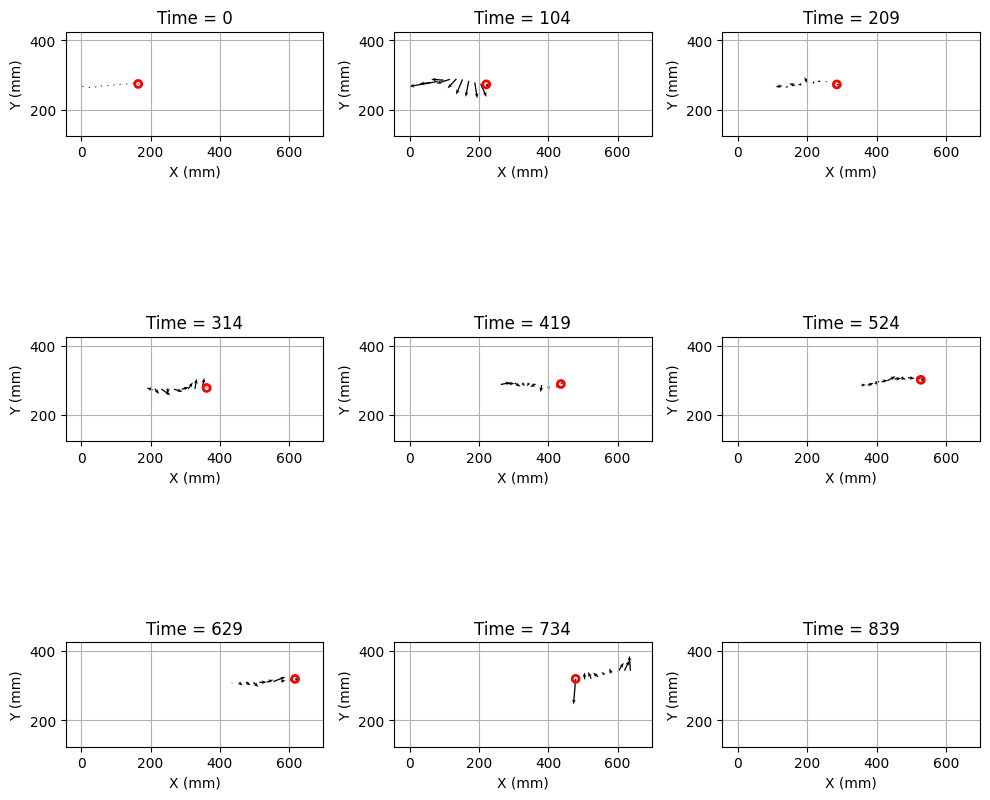

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the new CSV file
file_path = '/Users/jamesxu/Downloads/tracking/40cm/videos/10joints_40cm_1.21Hz_compressedDLC_resnet50_semi_2Sep26shuffle1_100000.csv'
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for the markers
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns[:20]].astype(float)  # Assuming first 20 columns are x, y for 10 markers

# Separate the x and y coordinates
x_coords = coordinates_df.iloc[:, ::2]  # All x-coordinates (every second column)
y_coords = coordinates_df.iloc[:, 1::2]  # All y-coordinates (every second column starting from index 1)

# Define the number of time points to sample (9 points)
num_points = 9
time_indices = np.linspace(0, len(x_coords)-1, num_points, dtype=int)  # Evenly spaced indices

# Get global min and max values for x and y to fix axis limits
x_min, x_max = x_coords.min().min(), x_coords.max().max()
y_min, y_max = y_coords.min().min(), y_coords.max().max()

# Adjust figure size to make the subplots more square and balanced
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Plot quiver plot for each time point
for idx, time_idx in enumerate(time_indices):
    ax = axs[idx // 3, idx % 3]  # Access each subplot in the 3x3 grid

    # Get current and next frame coordinates for velocity calculation
    if time_idx < len(x_coords) - 1:
        x_current = x_coords.iloc[time_idx, :]
        y_current = y_coords.iloc[time_idx, :]
        x_next = x_coords.iloc[time_idx + 1, :]
        y_next = y_coords.iloc[time_idx + 1, :]

        # Compute velocity as difference between next and current coordinates
        u = x_next - x_current
        v = y_next - y_current

        # Plot the quiver (velocity vectors) with adjusted arrow size
        ax.quiver(x_current, y_current, u, v, angles='xy', scale_units='xy', scale=0.1, width=0.005, headlength=4, headaxislength=3)

        # Draw a red circle with radius 10 mm at the first marker
        circle = patches.Circle((x_current.iloc[0], y_current.iloc[0]), 10, color='red', fill=False, linewidth=2)
        ax.add_patch(circle)

    # Set axis limits slightly tighter for better visualization
    ax.set_xlim(x_min - 50, x_max + 50)
    ax.set_ylim(y_min - 50, y_max + 50)
    
    # Set equal aspect ratio for proper scaling
    ax.set_aspect('equal')

    ax.set_title(f'Time = {time_idx}')
    ax.set_xlabel('X (mm)')
    ax.set_ylabel('Y (mm)')
    ax.grid(True)

# Adjust layout to reduce subplot spacing and make the plots more balanced
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load the new CSV file
file_path = '/Users/jamesxu/Downloads/test_40cm/40cm_run3DLC_resnet50_40cm_newOct1shuffle1_100000_filtered.csv'
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for the markers
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns[:44]].astype(float)  # 22 markers (44 columns for x, y coordinates)

# Separate the x and y coordinates
x_coords = coordinates_df.iloc[:, ::2]  # All x-coordinates (every second column)
y_coords = coordinates_df.iloc[:, 1::2]  # All y-coordinates (every second column starting from index 1)

# Define the number of time points to sample (9 points)
num_points = 9
time_indices = np.linspace(0, len(x_coords)-1, num_points, dtype=int)  # Evenly spaced indices

# Create a 3x3 grid for subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Plot quiver plot for each time point
for idx, time_idx in enumerate(time_indices):
    ax = axs[idx // 3, idx % 3]  # Access each subplot in the 3x3 grid

    # Get current and next frame coordinates for velocity calculation
    if time_idx < len(x_coords) - 1:
        x_current = x_coords.iloc[time_idx, :]
        y_current = y_coords.iloc[time_idx, :]
        x_next = x_coords.iloc[time_idx + 1, :]
        y_next = y_coords.iloc[time_idx + 1, :]

        # Compute velocity as difference between next and current coordinates
        u = x_next - x_current
        v = y_next - y_current

        # Plot the quiver (velocity vectors)
        ax.quiver(x_current, y_current, u, v, angles='xy', scale_units='xy', scale=1)

    ax.set_title(f'Time = {time_idx}')
    ax.set_xlabel('X (mm)')
    ax.set_ylabel('Y (mm)')
    ax.grid(True)

# Adjust layout
plt.tight_layout()

# Define update function for animation
def update_quiver(frame):
    for idx, time_idx in enumerate(time_indices):
        ax = axs[idx // 3, idx % 3]  # Access each subplot

        # Get current and next frame coordinates for velocity calculation
        if frame < len(x_coords) - 1:
            x_current = x_coords.iloc[frame, :]
            y_current = y_coords.iloc[frame, :]
            x_next = x_coords.iloc[frame + 1, :]
            y_next = y_coords.iloc[frame + 1, :]

            # Compute velocity as difference between next and current coordinates
            u = x_next - x_current
            v = y_next - y_current

            # Clear the previous quiver plot and plot the new one
            ax.cla()
            ax.quiver(x_current, y_current, u, v, angles='xy', scale_units='xy', scale=1)
            ax.set_title(f'Time = {frame}')
            ax.set_xlabel('X (mm)')
            ax.set_ylabel('Y (mm)')
            ax.grid(True)

    return axs

# Create animation
ani = FuncAnimation(fig, update_quiver, frames=len(x_coords)-1, interval=200, blit=False)

# Save the animation as an mp4 file
save_path = '/Users/jamesxu/Downloads/tracking/40cm/videos/trajectory_animation.mp4'
ani.save(save_path, writer='ffmpeg', dpi=300)

# If you want to save it as a gif instead, uncomment the following line:
# ani.save('/Users/jamesxu/Downloads/tracking/40cm/videos/trajectory_animation.gif', writer='imagemagick', dpi=300)

# Display the animation
plt.show()
